In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker
from dateutil.relativedelta import relativedelta

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample

In [2]:
dados = pd.read_csv(open(r"D:\João\MBA\Diversos\TCC\Base Modelo - 20181216.txt", 'r', encoding='utf8'), sep=';', low_memory=False)

In [3]:
def dadosMissing(dados):
    #Apresenta todas as colunas que possuem missing
    for i in dados.columns:
        if sum(dados[i].isnull()) > 0:
            print(i + ' - ' + str(dados[i].dtype) + ':        ' + str(sum(dados[i].isnull())))

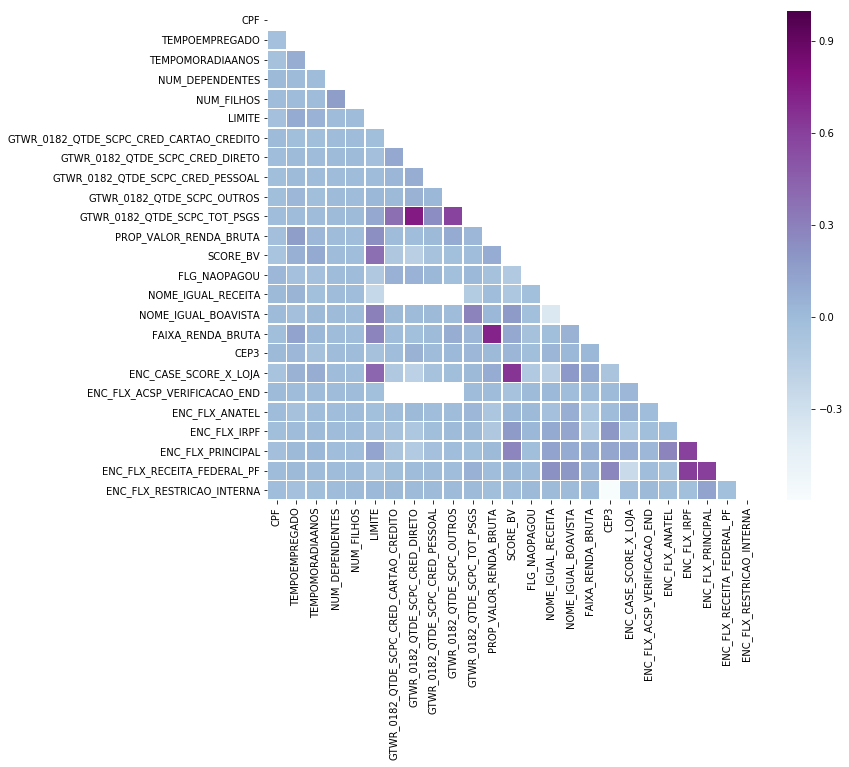

In [4]:
# Calcula a matriz de correlação
corr_all = dados.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [5]:
list(dados)

['CPF',
 'SEXO',
 'TEMPOEMPREGADO',
 'TEMPOMORADIAANOS',
 'ESCOLARIDADE',
 'ESTADOCIVIL',
 'PROFISSAO',
 'MORADIA',
 'OCUPACAO',
 'NUM_DEPENDENTES',
 'NUM_FILHOS',
 'POSSUIVEICULO',
 'DATACADASTRO',
 'LIMITE',
 'CASE_SCORE_X_LOJA',
 'FLX_ACSP_VERIFICACAO_END',
 'FLX_ANATEL',
 'FLX_BOAVISTANET',
 'FLX_IRPF',
 'FLX_PRINCIPAL',
 'FLX_RECEITA_FEDERAL_PF',
 'FLX_RESTRICAO_INTERNA',
 'GTWR_0001_SITUACAO_CADASTRAL',
 'GTWR_0021_SITUACAO_DECLARACAO',
 'GTWR_0021_TEM_DEBS',
 'GTWR_0021_TEM_RESTITUICAO',
 'GTWR_0182_EXISTE_NDAC_DOCS_SOLICS',
 'GTWR_0182_QTDE_SCPC_CRED_CARTAO_CREDITO',
 'GTWR_0182_QTDE_SCPC_CRED_DIRETO',
 'GTWR_0182_QTDE_SCPC_CRED_PESSOAL',
 'GTWR_0182_QTDE_SCPC_OUTROS',
 'GTWR_0182_QTDE_SCPC_TOT_PSGS',
 'PROP_DATA_NASCIMENTO_TITULAR',
 'PROP_VALOR_RENDA_BRUTA',
 'RGR_ACSP_CADASTRO_LOCALIZ',
 'RGR_ACSP_CEP_CONFERE',
 'RGR_ACSP_CPF_TEM_RESTRICAO',
 'RGR_ACSP_DT_NASC_CONFERE',
 'RGR_ACSP_NOME_MAE_EXISTE',
 'RGR_ANATEL_PROF_NULO',
 'RGR_IRPF_NAO_DECLARADO',
 'RGR_IRPF_RENDA_MAIOR_QU

In [6]:
dados['ESCOLARIDADE'].head()

0     Até 1º grau completo
1      Superior (Completo)
2     Até 2º grau completo
3     Até 1º grau completo
4    Superior (Incompleto)
Name: ESCOLARIDADE, dtype: object

In [7]:
dados['ESCOLARIDADE'].unique()

array(['Até 1º grau completo', 'Superior (Completo)',
       'Até 2º grau completo', 'Superior (Incompleto)', 'Outros'],
      dtype=object)

In [8]:
dados[dados['ESCOLARIDADE'] == 'Outros'].describe(percentiles=[.25, .50, .75, .7, .9, .95])

,CPF,TEMPOEMPREGADO,TEMPOMORADIAANOS,NUM_DEPENDENTES,NUM_FILHOS,LIMITE,GTWR_0182_QTDE_SCPC_CRED_CARTAO_CREDITO,GTWR_0182_QTDE_SCPC_CRED_DIRETO,GTWR_0182_QTDE_SCPC_CRED_PESSOAL,GTWR_0182_QTDE_SCPC_OUTROS,...,NOME_IGUAL_BOAVISTA,FAIXA_RENDA_BRUTA,CEP3,ENC_CASE_SCORE_X_LOJA,ENC_FLX_ACSP_VERIFICACAO_END,ENC_FLX_ANATEL,ENC_FLX_IRPF,ENC_FLX_PRINCIPAL,ENC_FLX_RECEITA_FEDERAL_PF,ENC_FLX_RESTRICAO_INTERNA
count,1.106500e+04,11065.000000,11065.000000,11065.000000,11065.000000,11065.000000,4353.000000,4353.000000,4353.000000,4353.000000,...,11065.000000,11065.000000,11065.000000,11065.000000,11065.000000,11065.000000,11065.000000,11065.000000,11065.000000,11065.000000
mean,2.748021e+10,3.014099,12.586082,0.000362,0.000723,606.723181,0.032391,0.148174,0.011486,0.078337,...,0.340172,0.939087,926.646362,4.424446,1.999638,1.972436,3.618256,4.444193,4.660009,2.990601
std,2.319113e+10,5.046170,10.392593,0.019011,0.032925,276.092612,0.185920,0.447991,0.133382,0.330819,...,0.473788,0.722592,592.204569,1.076722,0.053779,0.163728,0.815694,1.102067,0.888331,0.097428
min,1.675508e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.888970e+09,0.000000,4.000000,0.000000,0.000000,440.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,670.000000,4.000000,2.000000,2.000000,4.000000,5.000000,5.000000,3.000000
50%,2.400965e+10,0.000000,10.000000,0.000000,0.000000,570.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,858.000000,5.000000,2.000000,2.000000,4.000000,5.000000,5.000000,3.000000
70%,3.262474e+10,3.000000,16.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1170.000000,5.000000,2.000000,2.000000,4.000000,5.000000,5.000000,3.000000
75%,3.542622e+10,4.000000,20.000000,0.000000,0.000000,780.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1171.000000,5.000000,2.000000,2.000000,4.000000,5.000000,5.000000,3.000000
90%,6.434426e+10,8.000000,30.000000,0.000000,0.000000,900.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,2.000000,1318.000000,5.000000,2.000000,2.000000,4.000000,5.000000,5.000000,3.000000
95%,8.365806e+10,15.000000,34.000000,0.000000,0.000000,1140.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,2.000000,1333.000000,6.000000,2.000000,2.000000,4.000000,5.000000,5.000000,3.000000


In [9]:
dados[dados['ESCOLARIDADE'] == 'Outros'][['CPF', 'FLG_NAOPAGOU']].groupby('FLG_NAOPAGOU').count()

,CPF
FLG_NAOPAGOU,
0,10684
1,381


In [10]:
scale_mapper = {'Até 1º grau completo': 1,
                'Até 2º grau completo': 2,
                'Superior (Incompleto)': 3,
                'Superior (Completo)': 4,
                'Outros':3
}

In [11]:
dados['ENC_ESCOLARIDADE'] = dados['ESCOLARIDADE'].replace(scale_mapper)

In [12]:
list(dados)

['CPF',
 'SEXO',
 'TEMPOEMPREGADO',
 'TEMPOMORADIAANOS',
 'ESCOLARIDADE',
 'ESTADOCIVIL',
 'PROFISSAO',
 'MORADIA',
 'OCUPACAO',
 'NUM_DEPENDENTES',
 'NUM_FILHOS',
 'POSSUIVEICULO',
 'DATACADASTRO',
 'LIMITE',
 'CASE_SCORE_X_LOJA',
 'FLX_ACSP_VERIFICACAO_END',
 'FLX_ANATEL',
 'FLX_BOAVISTANET',
 'FLX_IRPF',
 'FLX_PRINCIPAL',
 'FLX_RECEITA_FEDERAL_PF',
 'FLX_RESTRICAO_INTERNA',
 'GTWR_0001_SITUACAO_CADASTRAL',
 'GTWR_0021_SITUACAO_DECLARACAO',
 'GTWR_0021_TEM_DEBS',
 'GTWR_0021_TEM_RESTITUICAO',
 'GTWR_0182_EXISTE_NDAC_DOCS_SOLICS',
 'GTWR_0182_QTDE_SCPC_CRED_CARTAO_CREDITO',
 'GTWR_0182_QTDE_SCPC_CRED_DIRETO',
 'GTWR_0182_QTDE_SCPC_CRED_PESSOAL',
 'GTWR_0182_QTDE_SCPC_OUTROS',
 'GTWR_0182_QTDE_SCPC_TOT_PSGS',
 'PROP_DATA_NASCIMENTO_TITULAR',
 'PROP_VALOR_RENDA_BRUTA',
 'RGR_ACSP_CADASTRO_LOCALIZ',
 'RGR_ACSP_CEP_CONFERE',
 'RGR_ACSP_CPF_TEM_RESTRICAO',
 'RGR_ACSP_DT_NASC_CONFERE',
 'RGR_ACSP_NOME_MAE_EXISTE',
 'RGR_ANATEL_PROF_NULO',
 'RGR_IRPF_NAO_DECLARADO',
 'RGR_IRPF_RENDA_MAIOR_QU

In [13]:
dados['PROP_DATA_NASCIMENTO_TITULAR'].head()

0    05/02/1985
1    15/03/1966
2    07/09/1989
3    27/09/1983
4    05/09/1985
Name: PROP_DATA_NASCIMENTO_TITULAR, dtype: object

In [14]:
dados['NOME_IGUAL_BOAVISTA'] = dados['NOME_IGUAL_BOAVISTA'].apply(lambda x: "NAO" if x == 0 else "SIM")

In [15]:
dados['NOME_IGUAL_RECEITA'] = dados['NOME_IGUAL_RECEITA'].apply(lambda x: "NAO" if x == 0 else "SIM")

In [16]:
dadosMissing(dados)

GTWR_0182_QTDE_SCPC_CRED_CARTAO_CREDITO - float64:        152399
GTWR_0182_QTDE_SCPC_CRED_DIRETO - float64:        152399
GTWR_0182_QTDE_SCPC_CRED_PESSOAL - float64:        152399
GTWR_0182_QTDE_SCPC_OUTROS - float64:        152399
PROP_DATA_NASCIMENTO_TITULAR - object:        9957


In [17]:
dados['FLX_ACSP_VERIFICACAO_END'].unique()

array(['SEGUIR - A', 'SEGUIR - P', 'SEGUIR-ALM'], dtype=object)

In [18]:
dados['FLX_ANATEL'].unique()

array(['SEGUIR - A', 'SEGUIR - P'], dtype=object)

In [19]:
dados['FLX_BOAVISTANET'].unique()

array(['MISSING',
       'SEGUIR - A                                                                                                                                                                                                                                                     ',
       'SEGUIR - P                                                                                                                                                                                                                                                     ',
       'SEGUIR - A', 'PARAR - R', 'SEGUIR-ALM', 'SEGUIR - P',
       'PARAR - R                                                                                                                                                                                                                                                      ',
       'SEGUIR-ALM                                                                                                        

In [20]:
dados[dados['FLX_BOAVISTANET'] == '                                                                                                                                                                                                                                                               '].head()

,CPF,SEXO,TEMPOEMPREGADO,TEMPOMORADIAANOS,ESCOLARIDADE,ESTADOCIVIL,PROFISSAO,MORADIA,OCUPACAO,NUM_DEPENDENTES,...,CEP3,ENC_CASE_SCORE_X_LOJA,ENC_FLX_ACSP_VERIFICACAO_END,ENC_FLX_ANATEL,ENC_FLX_BOAVISTANET,ENC_FLX_IRPF,ENC_FLX_PRINCIPAL,ENC_FLX_RECEITA_FEDERAL_PF,ENC_FLX_RESTRICAO_INTERNA,ENC_ESCOLARIDADE
146043,35901977815,F,7,20,Até 2º grau completo,Casado,AUTÔNOMO,Própria,Autônomo,0,...,336,6.0,2,2,...,1,2,1,1,2
146044,35901977815,F,7,20,Até 2º grau completo,Casado,AUTÔNOMO,Própria,Autônomo,0,...,336,6.0,2,2,...,1,2,1,1,2


In [21]:
dados['FLX_BOAVISTANET'] = dados['FLX_BOAVISTANET'].replace('                                                                                                                                                                                                                                                               ', 'MISSING')

In [22]:
dados['FLX_BOAVISTANET'] = dados['FLX_BOAVISTANET'].apply(lambda x: 'SEGUIR - A' if x == 'SEGUIR - A                                                                                                                                                                                                                                                     ' else x)

In [23]:
dados['FLX_BOAVISTANET'] = dados['FLX_BOAVISTANET'].apply(lambda x: 'SEGUIR - P' if x == 'SEGUIR - P                                                                                                                                                                                                                                                     ' else x)

In [24]:
dados['FLX_BOAVISTANET'] = dados['FLX_BOAVISTANET'].apply(lambda x: 'PARAR - R' if x == 'PARAR - R                                                                                                                                                                                                                                                      ' else x)

In [25]:
dados['FLX_BOAVISTANET'] = dados['FLX_BOAVISTANET'].apply(lambda x: 'SEGUIR-ALM' if x == 'SEGUIR-ALM                                                                                                                                                                                                                                                     ' else x)

In [26]:
dados['FLX_BOAVISTANET'].unique()

array(['MISSING', 'SEGUIR - A', 'SEGUIR - P', 'PARAR - R', 'SEGUIR-ALM'],
      dtype=object)

In [27]:
dados['ENC_FLX_BOAVISTANET'].unique()

array(['1',
       'SEGUIR - A                                                                                                                                                                                                                                                     ',
       'SEGUIR - P                                                                                                                                                                                                                                                     ',
       '4', '2', 'SEGUIR-ALM', '3',
       'PARAR - R                                                                                                                                                                                                                                                      ',
       'SEGUIR-ALM                                                                                                                                        

In [28]:
scale_mapper = {'SEGUIR - A': 4,
                'SEGUIR-ALM': 5,
                'SEGUIR - P': 3,
                'PARAR - R': 2,
                'MISSING': 1
            }

In [29]:
dados['ENC_FLX_BOAVISTANET'] = dados['FLX_BOAVISTANET'].replace(scale_mapper)

In [30]:
dados['ENC_FLX_BOAVISTANET'].unique()

array([1, 4, 3, 2, 5], dtype=int64)

In [31]:
dados['FLX_IRPF'].unique()

array(['SEGUIR - A', 'SEGUIR - P', 'MISSING', 'SEGUIR - F'], dtype=object)

In [32]:
dados['FLX_PRINCIPAL'].unique()

array(['A', 'M', 'R', 'MISSING', 'P'], dtype=object)

In [33]:
dados['FLX_RECEITA_FEDERAL_PF'].unique()

array(['SEGUIR - A', 'SEGUIR - F', 'SEGUIR - P', 'MISSING', 'PARAR - R'],
      dtype=object)

In [34]:
dados['FLX_RESTRICAO_INTERNA'].unique()

array(['SEGUIR - A', 'SEGUIR - P', 'PARAR - R'], dtype=object)

In [35]:
dados['ENC_ESCOLARIDADE'].unique()

array([1, 4, 2, 3], dtype=int64)

# Início

*

# Montagem do feature matrix e target

## Downsampling

In [36]:
# Separate majority and minority classes
maior_classe = dados[dados.FLG_NAOPAGOU == 0]
menor_classe = dados[dados.FLG_NAOPAGOU == 1]

In [37]:
menor_classe.count()[0]

8212

In [38]:
# Downsample majority class
maior_classe_downsampled = resample(maior_classe, 
                                 replace=False,    # sample without replacement
                                 n_samples=menor_classe.count()[0],     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
dados_ds = pd.concat([maior_classe_downsampled, menor_classe])
 
# Display new class counts
dados_ds.FLG_NAOPAGOU.value_counts()

1    8212
0    8212
Name: FLG_NAOPAGOU, dtype: int64

In [39]:
dados_ds.shape

(16424, 65)

In [40]:
dados_numericos = ['TEMPOEMPREGADO', 'TEMPOMORADIAANOS', 'NUM_DEPENDENTES', 'NUM_FILHOS', 'LIMITE', 'SCORE_BV', 
                   'FAIXA_RENDA_BRUTA', 'ENC_CASE_SCORE_X_LOJA', 'ENC_FLX_ACSP_VERIFICACAO_END', 'ENC_FLX_ANATEL', 
                   'ENC_FLX_BOAVISTANET', 'ENC_FLX_IRPF', 'ENC_FLX_PRINCIPAL', 'ENC_FLX_RECEITA_FEDERAL_PF', 
                   'ENC_FLX_RESTRICAO_INTERNA', 'ENC_ESCOLARIDADE']

In [41]:
dados_nao_numericos = ['SEXO', 'ESTADOCIVIL', 'MORADIA', 'OCUPACAO', 'POSSUIVEICULO', 
                       'FLX_ACSP_VERIFICACAO_END', 'FLX_ANATEL', 'FLX_BOAVISTANET', 'FLX_IRPF', 'FLX_PRINCIPAL',
                       'FLX_RECEITA_FEDERAL_PF', 'FLX_RESTRICAO_INTERNA', 'GTWR_0001_SITUACAO_CADASTRAL', 
                       'GTWR_0021_SITUACAO_DECLARACAO', 'GTWR_0021_TEM_DEBS', 'GTWR_0021_TEM_RESTITUICAO',
                       'GTWR_0182_EXISTE_NDAC_DOCS_SOLICS', 'RGR_ACSP_CADASTRO_LOCALIZ', 'RGR_ACSP_CEP_CONFERE',
                       'RGR_ACSP_CPF_TEM_RESTRICAO', 'RGR_ACSP_DT_NASC_CONFERE', 'RGR_ACSP_NOME_MAE_EXISTE',
                       'RGR_ANATEL_PROF_NULO', 'RGR_IRPF_NAO_DECLARADO', 'RGR_IRPF_RENDA_MAIOR_QUE_PISO', 
                       'RGR_NAT_OCUP_SEM_TEL_PROF', 'RGR_RFPF_NOME_CONFERE', 'RGR_RI_DDD_CLI_IGUAL_UF_RES',
                       'RGR_THSYSTEM_CEP_CONFERE', 'CEP3', 'NOME_IGUAL_RECEITA', 'NOME_IGUAL_BOAVISTA']

In [42]:
X = pd.concat([dados_ds[dados_numericos], pd.get_dummies(dados_ds[dados_nao_numericos])], axis=1)

In [43]:
X.shape

(16424, 128)

In [44]:
y = dados_ds.FLG_NAOPAGOU

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
X_train.count()[0]

11496

In [47]:
y_train.value_counts()

1    5762
0    5734
Name: FLG_NAOPAGOU, dtype: int64

## Ajustando a escala dos dados

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Cluster utilizando KMeans

In [50]:
from sklearn.cluster import KMeans

In [51]:
cluster = KMeans(n_clusters=3, random_state=42, n_jobs=-1)

In [52]:
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [53]:
dados_ds['CLUSTER'] = cluster.labels_

In [54]:
dados_ds['CLUSTER'].unique()

array([0, 2, 1], dtype=int64)

In [55]:
list(dados_ds)

['CPF',
 'SEXO',
 'TEMPOEMPREGADO',
 'TEMPOMORADIAANOS',
 'ESCOLARIDADE',
 'ESTADOCIVIL',
 'PROFISSAO',
 'MORADIA',
 'OCUPACAO',
 'NUM_DEPENDENTES',
 'NUM_FILHOS',
 'POSSUIVEICULO',
 'DATACADASTRO',
 'LIMITE',
 'CASE_SCORE_X_LOJA',
 'FLX_ACSP_VERIFICACAO_END',
 'FLX_ANATEL',
 'FLX_BOAVISTANET',
 'FLX_IRPF',
 'FLX_PRINCIPAL',
 'FLX_RECEITA_FEDERAL_PF',
 'FLX_RESTRICAO_INTERNA',
 'GTWR_0001_SITUACAO_CADASTRAL',
 'GTWR_0021_SITUACAO_DECLARACAO',
 'GTWR_0021_TEM_DEBS',
 'GTWR_0021_TEM_RESTITUICAO',
 'GTWR_0182_EXISTE_NDAC_DOCS_SOLICS',
 'GTWR_0182_QTDE_SCPC_CRED_CARTAO_CREDITO',
 'GTWR_0182_QTDE_SCPC_CRED_DIRETO',
 'GTWR_0182_QTDE_SCPC_CRED_PESSOAL',
 'GTWR_0182_QTDE_SCPC_OUTROS',
 'GTWR_0182_QTDE_SCPC_TOT_PSGS',
 'PROP_DATA_NASCIMENTO_TITULAR',
 'PROP_VALOR_RENDA_BRUTA',
 'RGR_ACSP_CADASTRO_LOCALIZ',
 'RGR_ACSP_CEP_CONFERE',
 'RGR_ACSP_CPF_TEM_RESTRICAO',
 'RGR_ACSP_DT_NASC_CONFERE',
 'RGR_ACSP_NOME_MAE_EXISTE',
 'RGR_ANATEL_PROF_NULO',
 'RGR_IRPF_NAO_DECLARADO',
 'RGR_IRPF_RENDA_MAIOR_QU

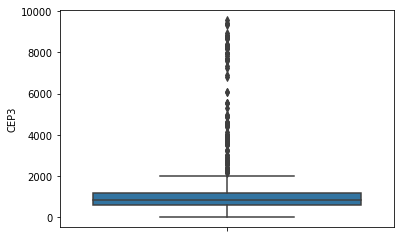

In [56]:
sns.boxplot(y='CEP3', hue='CLUSTER', data=dados_ds)

In [57]:
def cluster(x):
    if x == 0:
        return 'A'
    elif x == 1:
        return 'B'
    else:
        return 'C'

In [58]:
dados_ds['CLUSTER'] = dados_ds['CLUSTER'].apply(cluster)

In [59]:
dados_ds['CLUSTER'].unique()

array(['A', 'C', 'B'], dtype=object)

## Montagem do feature matrix e target com Cluster

In [60]:
dados_numericos = ['TEMPOEMPREGADO', 'TEMPOMORADIAANOS', 'NUM_DEPENDENTES', 'NUM_FILHOS', 'LIMITE', 'SCORE_BV', 
                   'FAIXA_RENDA_BRUTA', 'ENC_CASE_SCORE_X_LOJA', 'ENC_FLX_ACSP_VERIFICACAO_END', 'ENC_FLX_ANATEL', 
                   'ENC_FLX_BOAVISTANET', 'ENC_FLX_IRPF', 'ENC_FLX_PRINCIPAL', 'ENC_FLX_RECEITA_FEDERAL_PF', 
                   'ENC_FLX_RESTRICAO_INTERNA', 'ENC_ESCOLARIDADE']

In [61]:
dados_nao_numericos = ['SEXO', 'ESTADOCIVIL', 'MORADIA', 'OCUPACAO', 'POSSUIVEICULO', 
                       'FLX_ACSP_VERIFICACAO_END', 'FLX_ANATEL', 'FLX_BOAVISTANET', 'FLX_IRPF', 'FLX_PRINCIPAL',
                       'FLX_RECEITA_FEDERAL_PF', 'FLX_RESTRICAO_INTERNA', 'GTWR_0001_SITUACAO_CADASTRAL', 
                       'GTWR_0021_SITUACAO_DECLARACAO', 'GTWR_0021_TEM_DEBS', 'GTWR_0021_TEM_RESTITUICAO',
                       'GTWR_0182_EXISTE_NDAC_DOCS_SOLICS', 'RGR_ACSP_CADASTRO_LOCALIZ', 'RGR_ACSP_CEP_CONFERE',
                       'RGR_ACSP_CPF_TEM_RESTRICAO', 'RGR_ACSP_DT_NASC_CONFERE', 'RGR_ACSP_NOME_MAE_EXISTE',
                       'RGR_ANATEL_PROF_NULO', 'RGR_IRPF_NAO_DECLARADO', 'RGR_IRPF_RENDA_MAIOR_QUE_PISO', 
                       'RGR_NAT_OCUP_SEM_TEL_PROF', 'RGR_RFPF_NOME_CONFERE', 'RGR_RI_DDD_CLI_IGUAL_UF_RES',
                       'RGR_THSYSTEM_CEP_CONFERE', 'CEP3', 'NOME_IGUAL_RECEITA', 'NOME_IGUAL_BOAVISTA', 'CLUSTER']

In [62]:
X = pd.concat([dados_ds[dados_numericos], pd.get_dummies(dados_ds[dados_nao_numericos])], axis=1)

In [63]:
X.shape

(16424, 131)

In [64]:
list(X)

['TEMPOEMPREGADO',
 'TEMPOMORADIAANOS',
 'NUM_DEPENDENTES',
 'NUM_FILHOS',
 'LIMITE',
 'SCORE_BV',
 'FAIXA_RENDA_BRUTA',
 'ENC_CASE_SCORE_X_LOJA',
 'ENC_FLX_ACSP_VERIFICACAO_END',
 'ENC_FLX_ANATEL',
 'ENC_FLX_BOAVISTANET',
 'ENC_FLX_IRPF',
 'ENC_FLX_PRINCIPAL',
 'ENC_FLX_RECEITA_FEDERAL_PF',
 'ENC_FLX_RESTRICAO_INTERNA',
 'ENC_ESCOLARIDADE',
 'CEP3',
 'SEXO_F',
 'SEXO_M',
 'ESTADOCIVIL_Amasiado',
 'ESTADOCIVIL_Casado',
 'ESTADOCIVIL_Divorciado',
 'ESTADOCIVIL_Outros',
 'ESTADOCIVIL_Solteiro',
 'ESTADOCIVIL_Uniao Estavel',
 'ESTADOCIVIL_Viúvo',
 'MORADIA_Alugada',
 'MORADIA_Com Parentes',
 'MORADIA_Em financiamento',
 'MORADIA_Funcional',
 'MORADIA_Outros',
 'MORADIA_Própria',
 'OCUPACAO_Aposentado',
 'OCUPACAO_Autônomo',
 'OCUPACAO_Do Lar',
 'OCUPACAO_Empregado',
 'OCUPACAO_Empregador',
 'OCUPACAO_Estudante',
 'OCUPACAO_Funcionário Publico',
 'OCUPACAO_Militar',
 'OCUPACAO_Outros',
 'OCUPACAO_Pensionista',
 'OCUPACAO_Profissional Liberal',
 'POSSUIVEICULO_N',
 'FLX_ACSP_VERIFICACAO_END

In [65]:
y = dados_ds.FLG_NAOPAGOU

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
X.head()

,TEMPOEMPREGADO,TEMPOMORADIAANOS,NUM_DEPENDENTES,NUM_FILHOS,LIMITE,SCORE_BV,FAIXA_RENDA_BRUTA,ENC_CASE_SCORE_X_LOJA,ENC_FLX_ACSP_VERIFICACAO_END,ENC_FLX_ANATEL,...,RGR_THSYSTEM_CEP_CONFERE_MISSING,RGR_THSYSTEM_CEP_CONFERE_N,RGR_THSYSTEM_CEP_CONFERE_S,NOME_IGUAL_RECEITA_NAO,NOME_IGUAL_RECEITA_SIM,NOME_IGUAL_BOAVISTA_NAO,NOME_IGUAL_BOAVISTA_SIM,CLUSTER_A,CLUSTER_B,CLUSTER_C
53485,0,6,0,0,880,725.000000,1,5.0,2,2,...,1,0,0,1,0,0,1,1,0,0
71192,0,5,0,0,900,678.784729,1,6.0,2,2,...,1,0,0,1,0,1,0,1,0,0
178596,0,5,0,0,570,915.000000,0,5.0,2,2,...,0,0,1,0,1,1,0,0,0,1
39776,4,10,0,0,900,848.000000,2,5.0,2,2,...,0,1,0,1,0,1,0,1,0,0
9623,0,10,0,0,810,592.000000,0,3.5,2,2,...,1,0,0,1,0,0,1,1,0,0


## Ajustando a escala dos dados

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest para escolher as features mais importantes

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
from sklearn.feature_selection import SelectFromModel

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

In [73]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

acc = roc_auc_score(y_test, predictions)
print("auc: %.4f" % acc)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy_score: 0.7007
auc: 0.7010
[[1617  861]
 [ 614 1836]]
             precision    recall  f1-score   support

          0       0.72      0.65      0.69      2478
          1       0.68      0.75      0.71      2450

avg / total       0.70      0.70      0.70      4928



In [74]:
feature_labels = list(X)

In [75]:
for feature in zip(feature_labels, rf.feature_importances_):
    print(feature)

('TEMPOEMPREGADO', 0.011709340364839506)
('TEMPOMORADIAANOS', 0.011022345952237498)
('NUM_DEPENDENTES', 0.0)
('NUM_FILHOS', 1.704910161626091e-05)
('LIMITE', 0.07006847558050895)
('SCORE_BV', 0.0943883290848036)
('FAIXA_RENDA_BRUTA', 0.01253575735463787)
('ENC_CASE_SCORE_X_LOJA', 0.0858447267279592)
('ENC_FLX_ACSP_VERIFICACAO_END', 0.0)
('ENC_FLX_ANATEL', 3.471491702812377e-05)
('ENC_FLX_BOAVISTANET', 0.008144721674137462)
('ENC_FLX_IRPF', 0.002950165241120835)
('ENC_FLX_PRINCIPAL', 0.005767869827011706)
('ENC_FLX_RECEITA_FEDERAL_PF', 0.0007531417893806868)
('ENC_FLX_RESTRICAO_INTERNA', 3.766657408979038e-05)
('ENC_ESCOLARIDADE', 0.006301191992921487)
('CEP3', 0.010909979544370696)
('SEXO_F', 0.010172854833049978)
('SEXO_M', 0.016466393010166554)
('ESTADOCIVIL_Amasiado', 0.00022637838096583243)
('ESTADOCIVIL_Casado', 0.04451835636137158)
('ESTADOCIVIL_Divorciado', 0.00016024506093599079)
('ESTADOCIVIL_Outros', 0.0009218041314895081)
('ESTADOCIVIL_Solteiro', 0.02374772348764136)
('ESTAD

In [76]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(rf, threshold=0.01)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=0.01)

In [77]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feature_labels[feature_list_index])

LIMITE
SCORE_BV
ENC_CASE_SCORE_X_LOJA
SEXO_F
SEXO_M
ESTADOCIVIL_Casado
ESTADOCIVIL_Solteiro
OCUPACAO_Aposentado
OCUPACAO_Autônomo
GTWR_0021_SITUACAO_DECLARACAO_IRPF_NAO_DECLARADO
GTWR_0021_SITUACAO_DECLARACAO_IRPF_RESTITUICAO_LIBERADA
GTWR_0021_TEM_RESTITUICAO_NAO_TEM_RESTITUICAO
GTWR_0021_TEM_RESTITUICAO_TEM_RESTITUICAO
RGR_ACSP_CEP_CONFERE_N
RGR_ACSP_CEP_CONFERE_S
RGR_ACSP_NOME_MAE_EXISTE_S
RGR_IRPF_NAO_DECLARADO_N
RGR_IRPF_NAO_DECLARADO_S
RGR_IRPF_RENDA_MAIOR_QUE_PISO_MISSING
RGR_IRPF_RENDA_MAIOR_QUE_PISO_N


In [78]:
X_train = sfm.transform(X_train)
X_test = sfm.transform(X_test)

In [79]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

acc = roc_auc_score(y_test, predictions)
print("auc: %.4f" % acc)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy_score: 0.7202
auc: 0.7204
[[1686  792]
 [ 587 1863]]
             precision    recall  f1-score   support

          0       0.74      0.68      0.71      2478
          1       0.70      0.76      0.73      2450

avg / total       0.72      0.72      0.72      4928



In [84]:
# Com todas as features

#accuracy_score: 0.7007
#auc: 0.7010
#[[1617  861]
# [ 614 1836]]
#             precision    recall  f1-score   support
#
#          0       0.72      0.65      0.69      2478
#          1       0.68      0.75      0.71      2450
#
#avg / total       0.70      0.70      0.70      4928

## Concluo que é melhor trabalhar somente com as variáveis mais importantes

# Regressão Logística

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lo = LogisticRegression(C=10)

In [83]:
lo.fit(X_train, y_train)
predictions = lo.predict(X_test)

acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

acc = roc_auc_score(y_test, predictions)
print("auc: %.4f" % acc)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy_score: 0.7159
auc: 0.7161
[[1707  771]
 [ 629 1821]]
             precision    recall  f1-score   support

          0       0.73      0.69      0.71      2478
          1       0.70      0.74      0.72      2450

avg / total       0.72      0.72      0.72      4928



In [85]:
# Random Forest

#accuracy_score: 0.7202
#auc: 0.7204
#[[1686  792]
# [ 587 1863]]
#             precision    recall  f1-score   support
#
#          0       0.74      0.68      0.71      2478
#          1       0.70      0.76      0.73      2450
#
#avg / total       0.72      0.72      0.72      4928

## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

acc = roc_auc_score(y_test, predictions)
print("auc: %.4f" % acc)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy_score: 0.7173
auc: 0.7174
[[1726  752]
 [ 641 1809]]
             precision    recall  f1-score   support

          0       0.73      0.70      0.71      2478
          1       0.71      0.74      0.72      2450

avg / total       0.72      0.72      0.72      4928



In [85]:
# Random Forest

#accuracy_score: 0.7202
#auc: 0.7204
#[[1686  792]
# [ 587 1863]]
#             precision    recall  f1-score   support
#
#          0       0.74      0.68      0.71      2478
#          1       0.70      0.76      0.73      2450
#
#avg / total       0.72      0.72      0.72      4928

## Neural Network

In [88]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [90]:
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
probs = mlp.predict_proba(X_test)

acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

auc_ = roc_auc_score(y_test, probs[:,1])
print("AUC: %.4f" % auc_)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy_score: 0.7534
AUC: 0.8234
[[1728  750]
 [ 465 1985]]
             precision    recall  f1-score   support

          0       0.79      0.70      0.74      2478
          1       0.73      0.81      0.77      2450

avg / total       0.76      0.75      0.75      4928



In [85]:
# Random Forest

#accuracy_score: 0.7202
#auc: 0.7204
#[[1686  792]
# [ 587 1863]]
#             precision    recall  f1-score   support
#
#          0       0.74      0.68      0.71      2478
#          1       0.70      0.76      0.73      2450
#
#avg / total       0.72      0.72      0.72      4928

## SVM

In [93]:
from sklearn.svm import SVC
clf = SVC(C=1.0)

In [94]:
clf.fit(X_train, y_train) 
predictions = clf.predict(X_test)

acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

auc_ = roc_auc_score(y_test, probs[:,1])
print("AUC: %.4f" % auc_)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy_score: 0.7433
AUC: 0.8234
[[1679  799]
 [ 466 1984]]
             precision    recall  f1-score   support

          0       0.78      0.68      0.73      2478
          1       0.71      0.81      0.76      2450

avg / total       0.75      0.74      0.74      4928



In [95]:
# Neural Network

#accuracy_score: 0.7534
#AUC: 0.8234
#[[1728  750]
# [ 465 1985]]
#             precision    recall  f1-score   support
#
#          0       0.79      0.70      0.74      2478
#          1       0.73      0.81      0.77      2450
#
#avg / total       0.76      0.75      0.75      4928

## Gradient Boosting

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
params = {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 2,
          'learning_rate': 0.01}

clf = GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
probs = clf.predict_proba(X_test)

acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

auc_ = roc_auc_score(y_test, probs[:,1])
print("AUC: %.4f" % auc_)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy_score: 0.7498
AUC: 0.8120
[[1703  775]
 [ 458 1992]]
             precision    recall  f1-score   support

          0       0.79      0.69      0.73      2478
          1       0.72      0.81      0.76      2450

avg / total       0.75      0.75      0.75      4928



In [95]:
# Neural Network

#accuracy_score: 0.7534
#AUC: 0.8234
#[[1728  750]
# [ 465 1985]]
#             precision    recall  f1-score   support
#
#          0       0.79      0.70      0.74      2478
#          1       0.73      0.81      0.77      2450
#
#avg / total       0.76      0.75      0.75      4928

In [110]:
# SVM

#accuracy_score: 0.7433
#AUC: 0.8234
#[[1679  799]
# [ 466 1984]]
#             precision    recall  f1-score   support
#
#          0       0.78      0.68      0.73      2478
#          1       0.71      0.81      0.76      2450
#
#avg / total       0.75      0.74      0.74      4928

In [109]:
# Gradient Boosting

#accuracy_score: 0.7498
#AUC: 0.8120
#[[1703  775]
# [ 458 1992]]
#             precision    recall  f1-score   support
#
#          0       0.79      0.69      0.73      2478
#          1       0.72      0.81      0.76      2450
#
#avg / total       0.75      0.75      0.75      4928

In [85]:
# Random Forest

#accuracy_score: 0.7202
#auc: 0.7204
#[[1686  792]
# [ 587 1863]]
#             precision    recall  f1-score   support
#
#          0       0.74      0.68      0.71      2478
#          1       0.70      0.76      0.73      2450
#
#avg / total       0.72      0.72      0.72      4928

### O melhor modelo foi com Neural Network

# Cross Validation e Grid Search: GradientBoosting, SVM e Neural Network

In [96]:
from sklearn.model_selection import GridSearchCV

## Neural Network

In [111]:
tuned_parameters = [{'hidden_layer_sizes': [(1,), (5,), (10,), (5,5,)],
                     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                     'learning_rate': ['constant', 'adaptive'],
                     'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}]

In [112]:
clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=3)
clf.fit(X_train, y_train)

C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [(1,), (5,), (10,), (5, 5)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'adaptive'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
predictions = clf.predict(X_test)
probs = clf.predict_proba(X_test)

In [114]:
print("Melhores parâmetros na base de treino:")
print()
print(clf.best_params_)
print()

print("Métricas:")
print()

acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

auc_ = roc_auc_score(y_test, probs[:,1])
print("AUC: %.4f" % auc_)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Melhores parâmetros na base de treino:

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}

Métricas:

accuracy_score: 0.7534
AUC: 0.8181
[[1705  773]
 [ 442 2008]]
             precision    recall  f1-score   support

          0       0.79      0.69      0.74      2478
          1       0.72      0.82      0.77      2450

avg / total       0.76      0.75      0.75      4928



## GradientBoostingClassifier

In [115]:
tuned_parameters = [{'n_estimators': [10, 100, 300],
                     'max_depth' : [3, 10],
                     'min_samples_split': [2, 10],
                     'learning_rate': [0.001, 0.1], 
                     'subsample': [0.5, 1]}]

In [116]:
clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 100, 300], 'max_depth': [3, 10], 'min_samples_split': [2, 10], 'learning_rate': [0.001, 0.1], 'subsample': [0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:
predictions = clf.predict(X_test)
probs = clf.predict_proba(X_test)

In [118]:
print("Melhores parâmetros na base de treino:")
print()
print(clf.best_params_)
print()

print("Métricas:")
print()

acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

auc_ = roc_auc_score(y_test, probs[:,1])
print("AUC: %.4f" % auc_)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Melhores parâmetros na base de treino:

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1}

Métricas:

accuracy_score: 0.7735
AUC: 0.8403
[[1737  741]
 [ 375 2075]]
             precision    recall  f1-score   support

          0       0.82      0.70      0.76      2478
          1       0.74      0.85      0.79      2450

avg / total       0.78      0.77      0.77      4928



## SVM

In [119]:
tuned_parameters = [{'kernel': ['rbf', 'linear'],
                     'C': [10, 1000]}]

In [ ]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
print("Melhores parâmetros na base de treino:")
print()
print(clf.best_params_)
print()

print("Métricas:")
print()

acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

auc_ = roc_auc_score(y_test, probs[:,1])
print("AUC: %.4f" % auc_)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))